In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [3]:
train_data = Data()
valid_data = Data(train=False)

In [4]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
model = linear_regression(1, 1)

In [6]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

In [7]:
epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
train_error = torch.zeros(len(learning_rates))
valid_error = torch.zeros(len(learning_rates))

MODELS = []

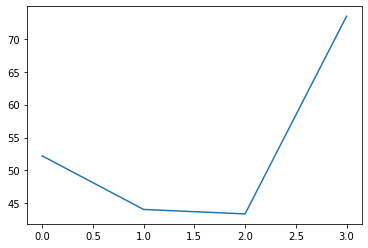

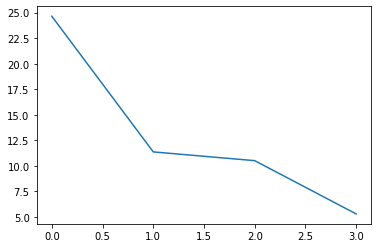

In [8]:
def train_model_with_lr(iter, lr_list):
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()

        Yhat = model(valid_data.x)
        valid_loss = criterion(Yhat, valid_data.y)
        valid_error[i] = valid_loss.item()

    plt.plot(train_error)
    plt.show()

    plt.plot(valid_error)
    plt.show()

train_model_with_lr(10, learning_rates)